# Problem 1

In [31]:
import numpy as np
import matplotlib.pyplot as plt

T_in = 20  # degC
D = 0.025  # m
L = 2  # m
m_rate = 10 / 1000  # kg/s
q_flux = 1e3  # W/m^2
nu = 1e-6  # m^2/s
kappa = 0.6  # W/mK
Pr = 7  # no units

rho = 1000  # kg/m^3
A = 0.25 * np.pi * D**2  # m^2

u = m_rate / (rho * A)  # m/s
Re = u * D / nu  # no units

lambda_n_sqr = np.array([25.6796,83.8618, 174.167,296.536,450.947,637.387, 855.850])
Rn = np.array([-0.492597, 0.395508, -0.345872, 0.314047, -0.291252, 0.273808, -0.259852])
Cn = np.array([0.403483, -0.175111, 0.105594, -0.732804, 0.0550357, -0.043483, 0.035597])

x = np.arange(0.1, L+0.01, 0.01)
T_wall = np.zeros_like(x)
T_mean = np.zeros_like(x)

for i, xi in enumerate(x):
    summation_term = np.sum(Cn * Rn * np.exp(-lambda_n_sqr * xi / (Re * Pr * 0.5 * D)))
    non_dim_temperature = 8 * xi / (D * Re * Pr) + 1 - 1/4 - 7/24 + summation_term
    T_wall[i] = T_in + non_dim_temperature * q_flux * D / (2 * kappa)
    T_mean[i] = T_in + (8 * xi / (Re * Pr * D)) * q_flux * D / (2 * kappa)

plt.plot(x, T_wall, label="Wall Temperature", linewidth=3)
plt.plot(x, T_mean, label="Mean Temperature", linewidth=3)
plt.xlabel("Length of the pipe (m)")
plt.ylabel("Temperature (degC)")
plt.legend()
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig("problem1_plot.svg")
plt.close()


In [32]:
T_wall[-1]

31.946983533673

# Problem 2

In [6]:
L = 200
D = 1
r0 = D / 2
Re = 1000
Pr = 100

Gz = Re * Pr / (L/r0)
print('Gz',Gz)
lambda_n = np.array([2.7043644,6.679032,10.67338,14.67108,18.66987])
Gn = np.array([0.74879,0.54383,0.46288,0.41518,0.38237])

t1 = Gn * np.exp(-lambda_n**2 / Gz)
t2 = t1 / lambda_n**2
Nu_L = np.sum(t1) / (2 * np.sum(t2))
print('Nu_L',Nu_L)
Nu_fd = 3.66
Delta = 1 - 2 * Nu_L / Nu_fd
print('Delta',Delta)

Gz 250.0
Nu_L 7.705549105121368
Delta -3.210682571104573


# Problem 5

In [7]:
Re = 1000
L = 2.5
D = 0.02
r0 = D / 2
rho = 870
mu = 0.004
cp = 1959
k = 0.128

Pr = mu * cp / k
Gz = Re * Pr / (L / D)

lambda_n_sqr = np.array([25.6796, 83.8618, 174.167, 296.536, 450.947, 637.387, 855.850])
Rn = np.array([-0.492597, 0.395508, -0.345872, 0.314047, -0.291252, 0.273808, -0.259852])
Cn = np.array([0.403483, -0.175111, 0.105594, -0.732804, 0.0550357, -0.043483, 0.035597])

t1 = Cn * Rn * np.exp(-2 * lambda_n_sqr / Gz)
Nu = 2 / (11/24 + np.sum(t1))
print('Nu',Nu)

Nu 14.28620294420507


# Problem 6

In [9]:
Ti = 20;
mdot = 0.04/60;
D = 0.05;
L = 6;
rho = 1.2047;
mu = 1.8205e-5;
cp = 1006.1;
k = 0.0256;
Pr = mu*cp/k;

# Assuming the fully developed flow

Nu = 4.36;
h = Nu*k/D;
q = h*10

print("Min. q = ",q, " W/m^2")

T_out = T_in + q*np.pi*D*L/(mdot*cp)

print("Exit temperature = ", T_out, " degC")

Re = 4*mdot/(np.pi*D*mu)
print("Re = ", Re);

Gz = Re*Pr*D/L

print("Gz = ",Gz)



Min. q =  22.3232  W/m^2
Exit temperature =  51.36733973370148  degC
Re =  932.5200364260096
Gz =  5.559923202942914


# Problem 7

In [22]:
def theta(y,Br):
    return 0.5+0.75*Br+0.5*y-0.75*Br*y**4

In [23]:
Br = [0,0.1,0.01]
t = []
y = np.arange(-1,1,0.1)
for i in Br:
    t.append(theta(y,i))

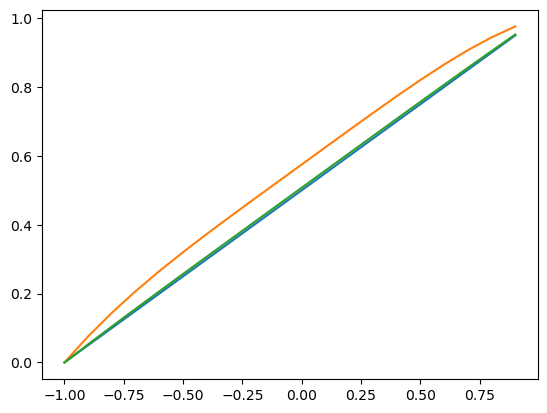

In [27]:
plt.plot(y,t[0],y,t[1],y,t[2])